In [2]:
import numpy as np
from PIL import Image
import os

In [4]:
listing = os.listdir('images/')
len(listing)

60000

In [56]:
def load(path="images/"):
    '''
    INPUT:
    path            : the path of folder to be processed
    
    OUTPUT:
    X, Y
    '''
    if path[-1] != '/':
        path += '/'
    
    listing = os.listdir(path)
    
    X = np.zeros((60000, 784))
    Y = np.zeros((60000, 1))
    
    for i in range(len(listing)):
        img = Image.open('images/' + listing[i]).convert('L')
        arr = np.asarray(img)
        label = listing[i][-5]
        X[i] = arr.flatten()
        Y[i] = label    
    return X, Y
    
X, Y = load()

[0.]


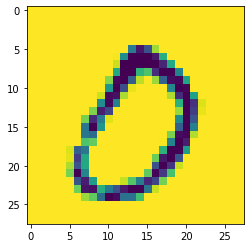

In [66]:
from matplotlib.pyplot import imshow

index = 300

%matplotlib inline
matrix = np.reshape(X[index], (28, 28))
img = Image.fromarray(matrix)
imshow(np.asarray(img))
print(Y[index])

In [76]:
from sklearn.model_selection import train_test_split
xTr, xTe, yTr, yTe = train_test_split(X, Y, test_size=0.05)

xTr, xVa, yTr, yVa = train_test_split(xTr, yTr, test_size=0.02, random_state=1)

In [77]:
print(xTr.shape)
print(yTr.shape)
print(xVa.shape)
print(yVa.shape)
print(xTe.shape)
print(yTe.shape)

(55860, 784)
(55860, 1)
(1140, 784)
(1140, 1)
(3000, 784)
(3000, 1)


In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xTr, yTr)

/Users/zhaiguankai/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [79]:
knn.score(xVa, yVa)

0.9614035087719298

这次测试验证集中的第39个照片
预测的数字是：0.0
实际的数字是：0.0


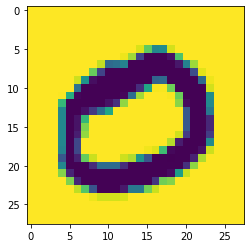

In [157]:
from random import randrange
index = randrange(1140)

%matplotlib inline
matrix = np.reshape(xVa[index], (28, 28))
img = Image.fromarray(matrix)
imshow(np.asarray(img))
x = np.reshape(xVa[index], (1, 784))
y_hat = knn.predict(x)[0]
y = yVa[index][0]
print("这次测试验证集中的第"+str(index+1)+"个照片")
print("预测的数字是："+str(y_hat))
print("实际的数字是："+str(y))

In [168]:
y_hat = np.reshape(knn.predict(xVa), (1140, 1))

In [172]:
wrong_indices = np.where(np.not_equal(y_hat, yVa))[0]
len(wrong_indices)

44

这次测试验证集中的第120个照片
预测的数字是：0.0
实际的数字是：5.0


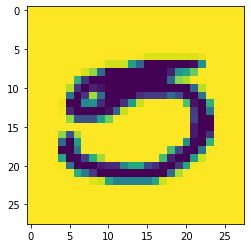

In [181]:
%matplotlib inline

from random import randrange
index = wrong_indices[randrange(44)]

matrix = np.reshape(xVa[index], (28, 28))
img = Image.fromarray(matrix)
imshow(np.asarray(img))
x = np.reshape(xVa[index], (1, 784))
y_hat = knn.predict(x)[0]
y = yVa[index][0]
print("这次测试验证集中的第"+str(index+1)+"个照片")
print("预测的数字是："+str(y_hat))
print("实际的数字是："+str(y))

In [183]:
np.unique(yVa[wrong_indices], return_counts=True)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([ 1,  1,  2,  5,  3,  7,  5,  2, 12,  6]))

In [184]:
np.unique(yVa, return_counts=True)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([114, 122, 105, 119, 109,  89, 137, 105, 118, 122]))